In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import Model
from keras import Input
from keras.utils import plot_model
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import backend as K

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.io as sio
import os

%matplotlib inline

In [2]:
label_train = []

for dirname, _, filenames in os.walk('..\Train\Adults'):
    for filename in filenames[:-50]:
        label_train.append(0)
        
for dirname, _, filenames in os.walk('..\Train\Teenagers'):
    for filename in filenames[:-50]:
        label_train.append(1)
        
for dirname, _, filenames in os.walk('..\Train\Toddler'):
    for filename in filenames[:-50]:
        label_train.append(2)

In [3]:
label_train = np.array(label_train).reshape(-1,1)

In [4]:
enc_y = OneHotEncoder(handle_unknown='ignore')
enc_y.fit(label_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [5]:
df_test = pd.read_csv('..\Dataset\Test.csv')

In [6]:
df_test.head()

,Filename
0,Img1137.jpg
1,Img3633.jpg
2,Img1474.jpg
3,Img3459.jpg
4,Img5578.jpg


In [7]:
for dirname, _, filenames in os.walk('..\Dataset\Test Data'):
    break

In [8]:
filenames = list(df_test['Filename'])

In [9]:
imgloc_test = []

for filename in filenames:
    imgloc_test.append((os.path.join(dirname, filename)))

In [10]:
img_test = []

for i in range(0, len(imgloc_test)):
    img1 = cv2.imread(imgloc_test[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(224,224))
    img_test.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [11]:
img_test = np.array(img_test)

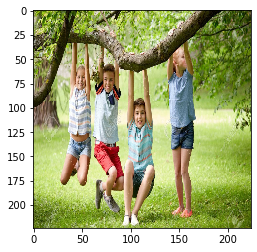

In [12]:
i = 5
plt.imshow(img_test[i])

In [13]:
img_test.shape

(314, 224, 224, 3)

In [14]:
x_test = img_test/255

In [15]:
x_test.shape

(314, 224, 224, 3)

In [ ]:
# model = load_model('VGG16-Mod1-colab.h5')

In [16]:
# reg = l2(1e-3)
reg = None

model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = x_test[0].shape,
                 kernel_regularizer = reg, padding='same'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(Flatten())

model.add(Dense(2048, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(1024, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(512, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(3, activation = 'softmax', kernel_regularizer = reg))

model.load_weights('VGG16-Mod1-colab.h5')

In [17]:
ymodel = model.predict(x_test)
ymodel = enc_y.inverse_transform(ymodel)

In [18]:
ymodel_label = []
for i in range(ymodel.shape[0]):
    if(ymodel[i,0] == 0): ymodel_label.append('Adults')
    elif(ymodel[i,0] == 1): ymodel_label.append('Teenagers')
    else: ymodel_label.append('Toddler')

In [19]:
df_test['Category'] = ymodel_label

In [20]:
df_test.head()

,Filename,Category
0,Img1137.jpg,Teenagers
1,Img3633.jpg,Toddler
2,Img1474.jpg,Adults
3,Img3459.jpg,Teenagers
4,Img5578.jpg,Toddler


In [21]:
df_test.to_csv('output.csv', index=False)